In [57]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle
from sklearn.model_selection import train_test_split


In [21]:
df = wrangle.get_zillow()

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138712 entries, 0 to 2138711
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 114.2 MB


In [5]:
df.head()


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
4,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2138712.0,3.307584,0.921752,1.00,3.00,3.00,4.0000,25.00
bathroomcnt,2138712.0,2.244637,0.986368,1.00,2.00,2.00,3.0000,32.00
calculatedfinishedsquarefeet,2138501.0,1863.979342,1162.613682,1.00,1259.00,1624.00,2209.0000,952576.00
taxvaluedollarcnt,2138605.0,460898.183100,676066.555840,1.00,189430.00,328617.00,535000.0000,90188462.00
yearbuilt,2137462.0,1960.967065,22.145304,1801.00,1949.00,1958.00,1976.0000,2016.00
taxamount,2136222.0,5619.461355,7784.820685,16.48,2546.24,4115.69,6415.5975,1078101.87
fips,2138712.0,6048.312126,20.342084,6037.00,6037.00,6037.00,6059.0000,6111.00


In [7]:
df.isnull().sum()/len(df) * 100


bedroomcnt                      0.000000
bathroomcnt                     0.000000
calculatedfinishedsquarefeet    0.009866
taxvaluedollarcnt               0.005003
yearbuilt                       0.058446
taxamount                       0.116425
fips                            0.000000
dtype: float64

In [8]:
# dropping nulls  
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134895 entries, 0 to 2138711
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.3 MB


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bedroomcnt                           1.00
bathroomcnt                          1.00
calculatedfinishedsquarefeet       949.00
taxvaluedollarcnt               345371.50
yearbuilt                           27.00
taxamount                         3869.07
fips                                22.00
dtype: float64


In [10]:
(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR))).mean()

bedroomcnt                      0.0
bathroomcnt                     0.0
calculatedfinishedsquarefeet    0.0
taxvaluedollarcnt               0.0
yearbuilt                       0.0
taxamount                       0.0
fips                            0.0
dtype: float64

In [20]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")
    

bedroomcnt
3.0     962632
4.0     633359
2.0     334073
5.0     150596
6.0      25102
1.0      22745
7.0       4786
8.0       1098
9.0        288
10.0       112
11.0        30
13.0        14
12.0        11
14.0         6
15.0         5
16.0         2
18.0         2
25.0         1
Name: bedroomcnt, dtype: int64
-----------------
bathroomcnt
2.00     942325
3.00     422356
1.00     411775
2.50     142811
4.00      82028
1.50      31155
3.50      28459
5.00      28297
4.50      19469
6.00      10716
5.50       6200
7.00       4380
8.00       1680
6.50       1328
9.00        704
7.50        379
10.00       318
11.00       143
8.50        108
12.00        68
9.50         49
13.00        37
14.00        20
10.50        14
15.00        12
16.00         8
18.00         7
20.00         4
1.75          3
17.00         3
12.50         3
11.50         3
Name: bathroomcnt, dtype: int64
-----------------
calculatedfinishedsquarefeet
1200.0     5164
1080.0     4370
1120.0     4335
1400.0     3828
144

In [ ]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.show()

In [24]:
# reasonably sizing up the houses
df[df.calculatedfinishedsquarefeet <= 25_000].taxvaluedollarcnt.mean()


460504.63980731036

In [25]:
df[df.calculatedfinishedsquarefeet <= 25_000].shape[0]/df.shape[0]

0.9998859126427495

In [31]:
df = df[df.calculatedfinishedsquarefeet <= 25_000]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2138468.0,3.307615,0.921479,1.00,3.00,3.00,4.00,25.00
bathroomcnt,2138468.0,2.244550,0.985324,1.00,2.00,2.00,3.00,20.00
calculatedfinishedsquarefeet,2138468.0,1863.082709,956.283649,1.00,1259.00,1624.00,2209.00,25000.00
taxvaluedollarcnt,2138361.0,460504.639807,662178.561204,1.00,189430.00,328616.00,535000.00,71067500.00
yearbuilt,2137354.0,1960.966515,22.144594,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2135982.0,5614.877348,7614.586139,16.48,2546.24,4115.62,6415.43,841059.04
fips,2138468.0,6048.311517,20.342472,6037.00,6037.00,6037.00,6059.00,6111.00


In [ ]:
# having a better view of the bathrooms
df.bathroomcnt.sort_values(ascending=False).head(100)


In [ ]:
# percentage of properties with less than 6 bathrooms
df[df.bathroomcnt>6].shape[0]/df.shape[0]

In [33]:
# dropping 6 bathrooms and higher 
# dropping 6 bedrooms and higher
df = df[df.bathroomcnt <= 6]
df = df[df.bedroomcnt <= 6]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2124827.0,3.288598,0.886767,1.00,3.0000,3.000,4.00,6.00
bathroomcnt,2124827.0,2.217093,0.912727,1.00,2.0000,2.000,3.00,6.00
calculatedfinishedsquarefeet,2124827.0,1833.935078,854.777316,1.00,1256.0000,1619.000,2193.00,24220.00
taxvaluedollarcnt,2124722.0,442392.214761,527620.663392,1.00,188648.0000,326839.000,530189.75,49386312.00
yearbuilt,2123730.0,1960.864706,22.045712,1801.00,1949.0000,1958.000,1975.00,2016.00
taxamount,2122378.0,5407.118895,6050.717089,16.48,2537.0625,4097.045,6363.70,560290.15
fips,2124827.0,6048.328073,20.358113,6037.00,6037.0000,6037.000,6059.00,6111.00


In [40]:
df[df.calculatedfinishedsquarefeet>70].shape[0]

2083954

In [ ]:
# DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')


In [ ]:
# percentage of houses under 6 bedrooms
df[df.bedroomcnt>6].shape[0]/df.shape[0]

In [35]:
# % of houses less than 1,800,000 in tax value
df[df.taxvaluedollarcnt<=1_800_000].shape[0]/df.shape[0]

0.9807706698004119

In [38]:
df = df[df.taxvaluedollarcnt<=1_800_000]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2083968.0,3.273427,0.877522,1.00,3.0000,3.000,4.00,6.00
bathroomcnt,2083968.0,2.179018,0.862674,1.00,2.0000,2.000,3.00,6.00
calculatedfinishedsquarefeet,2083968.0,1790.281170,773.225391,1.00,1250.0000,1605.000,2152.00,24220.00
taxvaluedollarcnt,2083968.0,392607.569342,298761.897938,1.00,185695.0000,321014.000,513182.25,1800000.00
yearbuilt,2082890.0,1960.609674,21.811893,1801.00,1949.0000,1958.000,1975.00,2016.00
taxamount,2081696.0,4842.678109,3471.415861,16.48,2505.2675,4030.415,6174.95,100379.34
fips,2083968.0,6048.386007,20.448869,6037.00,6037.0000,6037.000,6059.00,6111.00


In [41]:
# dropping data lower than 70 sqfeet due to industry analysis
df = df[df.calculatedfinishedsquarefeet>70]

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2083954.0,3.273431,0.877518,1.00,3.00,3.00,4.00,6.00
bathroomcnt,2083954.0,2.179017,0.862671,1.00,2.00,2.00,3.00,6.00
calculatedfinishedsquarefeet,2083954.0,1790.293169,773.214130,102.00,1250.00,1605.00,2152.00,24220.00
taxvaluedollarcnt,2083954.0,392607.880551,298761.481698,1.00,185696.00,321014.00,513181.25,1800000.00
yearbuilt,2082876.0,1960.609726,21.811848,1801.00,1949.00,1958.00,1975.00,2016.00
taxamount,2081682.0,4842.682149,3471.412479,16.48,2505.28,4030.42,6174.95,100379.34
fips,2083954.0,6048.386083,20.448916,6037.00,6037.00,6037.00,6059.00,6111.00


In [ ]:
# convert fips to catgorical

In [47]:
df["fips"] = pd.Categorical(df.fips)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083954 entries, 0 to 2138711
Data columns (total 7 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   bedroomcnt                    float64 
 1   bathroomcnt                   float64 
 2   calculatedfinishedsquarefeet  float64 
 3   taxvaluedollarcnt             float64 
 4   yearbuilt                     float64 
 5   taxamount                     float64 
 6   fips                          category
dtypes: category(1), float64(6)
memory usage: 113.3 MB


In [51]:
# get dummies on fips
dummy_df = pd.get_dummies(df[["fips"]], dummy_na =False, drop_first = [True,True])
df = pd.concat([df, dummy_df], axis = 1)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083954 entries, 0 to 2138711
Data columns (total 9 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   bedroomcnt                    float64 
 1   bathroomcnt                   float64 
 2   calculatedfinishedsquarefeet  float64 
 3   taxvaluedollarcnt             float64 
 4   yearbuilt                     float64 
 5   taxamount                     float64 
 6   fips                          category
 7   fips_6059.0                   uint8   
 8   fips_6111.0                   uint8   
dtypes: category(1), float64(6), uint8(2)
memory usage: 117.3 MB


In [87]:
df_clean = df.drop(columns = ("fips"))
df_clean.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips_6059.0,fips_6111.0
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,0,0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,0,0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,0,0
3,3.0,1.0,1244.0,169471.0,1950.0,2532.88,0,0
4,3.0,2.0,1300.0,233266.0,1950.0,3110.99,0,0


In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [91]:
# splitting my data
'''
This function performs split on zillow data, stratify taxvaluedollarcnt.
Returns train, validate, and test dfs.
'''
train_validate, test = train_test_split(df_clean, test_size=.2, 
                                        random_state=123) 
#                                         stratify=)
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123) 
#                                    stratify=train_validate)

In [92]:
train.shape, validate.shape, test.shape

((1167014, 8), (500149, 8), (416791, 8))

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

In [100]:
columns_to_scale = train[["bedroomcnt","bathroomcnt","calculatedfinishedsquarefeet","taxvaluedollarcnt","taxamount","yearbuilt"]]
columns_to_scale.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,yearbuilt
1611270,3.0,2.0,2462.0,350714.0,4315.37,1963.0
1426736,2.0,1.0,974.0,133518.0,1705.72,1923.0
1460194,4.0,3.0,2367.0,627599.0,7307.34,1967.0
1536170,4.0,2.0,1356.0,450000.0,6214.42,1950.0
775817,2.0,1.0,1187.0,73468.0,1026.61,1926.0


In [102]:
X_train, X_validate = columns_to_scale, columns_to_scale
y_train, y_validate = columns_to_scale, columns_to_scale

In [103]:
# fitting the scaled data no nead to scale target
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.fit_transform(X_validate)

In [106]:
X_train_scaled

array([[0.4       , 0.2       , 0.10371092, 0.19484066, 0.04283347,
        0.75348837],
       [0.2       , 0.        , 0.03781773, 0.07417615, 0.01683133,
        0.56744186],
       [0.6       , 0.4       , 0.09950403, 0.34866575, 0.072645  ,
        0.77209302],
       ...,
       [0.8       , 0.8       , 0.15020813, 0.8135899 , 0.19948774,
        0.94883721],
       [0.4       , 0.2       , 0.05508812, 0.11789118, 0.02762496,
        0.6       ],
       [0.4       , 0.2       , 0.05340537, 0.16404398, 0.03368696,
        0.71627907]])

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [109]:
from sklearn.preprocessing import StandardScaler


In [110]:
X_train_scaled

array([[0.4       , 0.2       , 0.10371092, 0.19484066, 0.04283347,
        0.75348837],
       [0.2       , 0.        , 0.03781773, 0.07417615, 0.01683133,
        0.56744186],
       [0.6       , 0.4       , 0.09950403, 0.34866575, 0.072645  ,
        0.77209302],
       ...,
       [0.8       , 0.8       , 0.15020813, 0.8135899 , 0.19948774,
        0.94883721],
       [0.4       , 0.2       , 0.05508812, 0.11789118, 0.02762496,
        0.6       ],
       [0.4       , 0.2       , 0.05340537, 0.16404398, 0.03368696,
        0.71627907]])

In [115]:
X_train_inverse = pd.DataFrame(scaler.inverse_transform(X_train_scaled))
X_train_inverse

,0,1,2,3,4,5
0,3.0,2.0,2462.0,350714.0,4315.37,1963.0
1,2.0,1.0,974.0,133518.0,1705.72,1923.0
2,4.0,3.0,2367.0,627599.0,7307.34,1967.0
3,4.0,2.0,1356.0,450000.0,6214.42,1950.0
4,2.0,1.0,1187.0,73468.0,1026.61,1926.0
...,...,...,...,...,...,...
1167009,3.0,2.0,1382.0,272517.0,3316.76,1959.0
1167010,4.0,2.0,1642.0,78104.0,738.24,1969.0
1167011,5.0,5.0,3512.0,1464462.0,20037.64,2005.0
1167012,3.0,2.0,1364.0,212205.0,2789.00,1930.0


In [116]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_validate_scaled = scaler.fit_transform(X_validate)

scaler2 = StandardScaler()
X_train_standard_scale = scaler2.fit_transform(X_train)
X_validate_standard_scale = scaler2.fit_transform(X_validate)


In [117]:
X_train_standard_scale

array([[-0.31252939, -0.20807084,  0.86831222, -0.13964137, -0.15139945,
         0.10891097],
       [-1.45127382, -1.36689144, -1.05653099, -0.86672752, -0.90310196,
        -1.72357499],
       [ 0.82621504,  0.95074976,  0.74542237,  0.78725991,  0.7104293 ,
         0.29215957],
       ...,
       [ 1.96495946,  3.26839096,  2.22656852,  3.58874566,  4.37735726,
         2.03302123],
       [-0.31252939, -0.20807084, -0.55203579, -0.60331462, -0.59106613,
        -1.40288995],
       [-0.31252939, -0.20807084, -0.60119173, -0.32521244, -0.41581818,
        -0.25758622]])

In [124]:

scaler3 = RobustScaler()
X_train_robust = scaler3.fit_transform(X_train)
X_validate_robust = scaler3.fit_transform(X_validate)
X_train_robust_df = pd.DataFrame(X_train_robust)
X_train_robust_df.head()

,0,1,2,3,4,5
0,0.0,0.0,0.949059,0.091133,0.078056,0.192308
1,-1.0,-1.0,-0.698782,-0.572886,-0.633304,-1.346154
2,1.0,1.0,0.843854,0.937635,0.893631,0.346154
3,1.0,0.0,-0.275748,0.394674,0.595714,-0.307692
4,-1.0,-1.0,-0.462901,-0.756473,-0.818421,-1.230769


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [126]:
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot


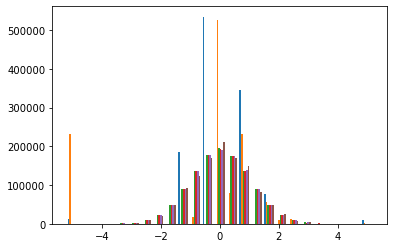

In [130]:
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(data)
# # histogram of the transformed data
# pyplot.hist(data_trans, bins=25)
# pyplot.show()
quintile_transformer = QuantileTransformer(output_distribution='normal')
X_train_Quant = quintile_transformer.fit_transform(X_train_robust_df)
# # histogram of the transformed data
plt.hist(X_train_Quant, bins=25)
plt.show()